# Dimensionality Reduction

## Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from utils import *

## Principal Component Analysis

- Unsupervised Linear Transformation Technique used for Feature Extraction and Dimensionality Reduction.
- Other Applications: Exploratory Data Analysis, Denoising the Signals in Stock Market Trading, Analysis of genome data and gene expression levels.
- PCA finds the direction of maximum variance in high-dimensional data and projects the data onto new subspace with equal or fewer dimensions than the original one.
- The orthogonal axes or principal components of the new subspace can be interpreted as directions of maximum variance given the constraint the axes are orthogonal to each other.
- Steps:
    - Standardize the d-dimensional dataset.
    - Construct the covariance matrix.
    - Decompose the covariance matrix into eigenvectors and eigenvalues.
    - Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
    - Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ($k \le d$).
    - Construct a projection matrix, W from the top k eigenvectors.
    - Transform the d-dimensional input dataset $X$, using the projection matrix, $W$ to obtain the new k-dimensional feature subspace.

In [3]:
# Load Wine Dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Create Features and Target
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=31415926)

In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# Get Covariance Matrix of features
cov_mat = np.cov(X_train_std.T)
# Get eigen values and eigen vectors from covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f"Eigen Values: \n{eigen_vals}")

Eigen Values: 
[4.67878474 2.35993144 1.56170694 0.95600528 0.91821831 0.68755151
 0.57575483 0.35430856 0.31448833 0.10926807 0.2521391  0.14700161
 0.19053236]


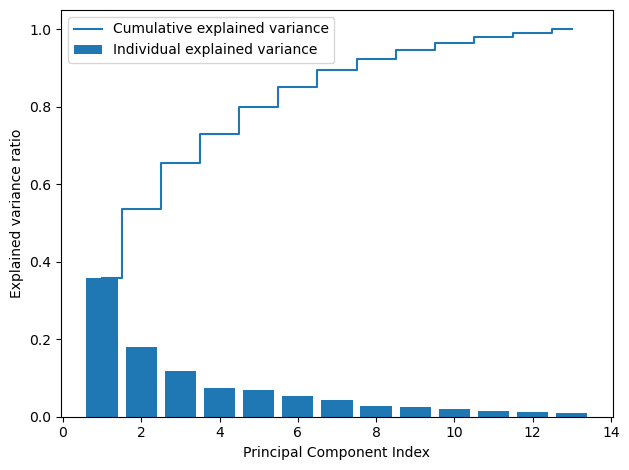

In [10]:
# Plot Variance Explained Ratios
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [11]:
# Make a list of (eigenvalues, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the pairs
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [12]:
# Select two eigenvectors that correspond to two largest eigenvalues
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print(f'Matrx W: \n{w}')

Matrx W: 
[[ 0.1280779   0.51122061]
 [-0.27058734  0.15436563]
 [ 0.00241476  0.29585535]
 [-0.2114418  -0.03270663]
 [ 0.15020722  0.24683451]
 [ 0.39359249  0.08540771]
 [ 0.42005132 -0.00069607]
 [-0.28436691  0.04800964]
 [ 0.29877166  0.03067645]
 [-0.11065097  0.5530884 ]
 [ 0.31047306 -0.26211817]
 [ 0.38734561 -0.17159965]
 [ 0.28799633  0.38819746]]


In [14]:
# Project one example from training set using the projection matrix
X_train_std[0].dot(w)

array([-1.11427297,  3.42147401])

In [15]:
# Transform entire dataset
X_train_pca = X_train_std.dot(w)

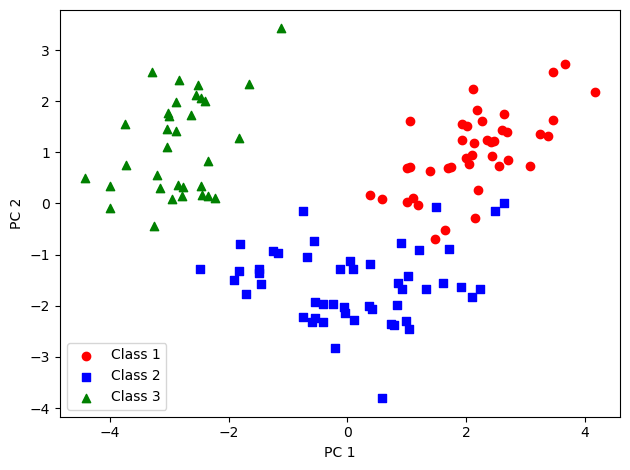

In [17]:
# Visualize
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show();

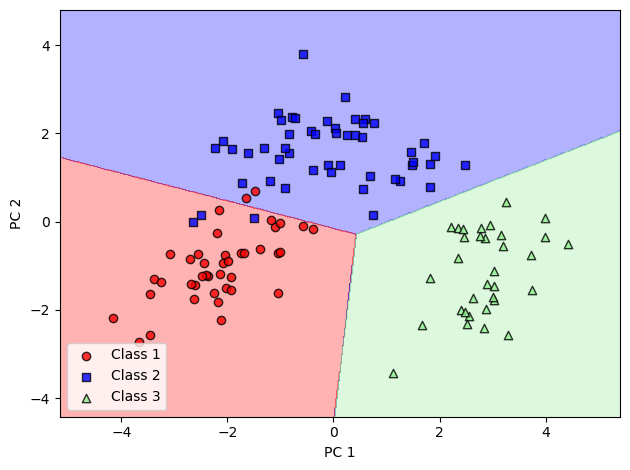

In [18]:
# Using PCA with sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', 
                        random_state=31415926, 
                        solver='lbfgs')
# Dimensionality Reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# Fit Logistic Regression
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show();

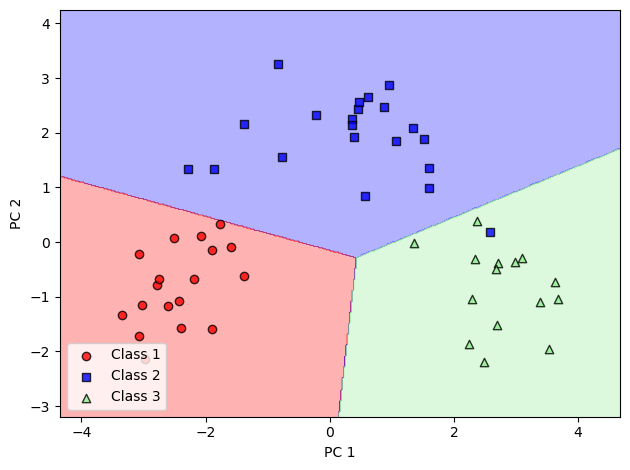

In [19]:
# test dataset
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show();

### Assessing Feature Contributions using PCA

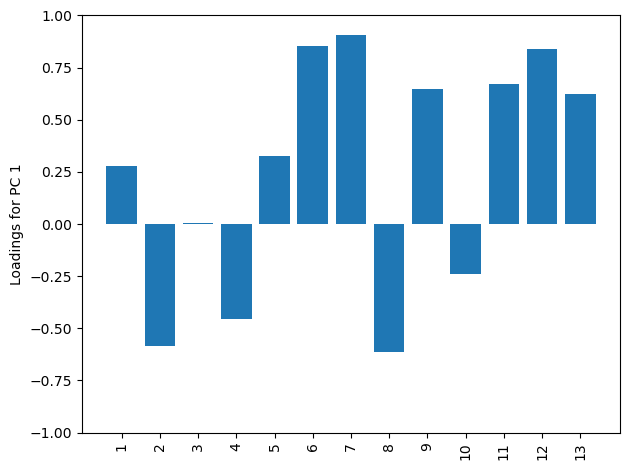

In [21]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show();

## Supervised Data Compression via Linear Discriminant Analysis

- The Goal of LDA is to find feature subspaces that optimize class separability.
- Assumption: 
    - Data is Normally Distributed.
    - Classes have identical Covariance Matrices.
    - Training examples are Statistically independent of each other.
- Steps:
    - Standardize the d-dimensional dataset.
    - Compute d-dimensional mean vector for each class.
    - Construct between-class scatter matrix, $S_B$ and within-class scatter matrix, $S_W$
    - Compute eigenvectors and corresponding eigenvalues of the matrix $S_W^{-1}S_B$
    - Sort eigenvalues by decreasing to rank the corresponding eigenvectors.
    - Choose k eigenvectors that correspond to the k largest eigenvalues to construct a dxk-dimensional transformation matrix, W; the eigenvectors are the columns of this matrix.
    - Project the examples onto the new feature subspace using the transformation matrix, W; the eigenvectors are the columns of this matrix.
    - Project the examples onto the new features subspace using the transformation matrix, W.

In [22]:
# Computing Scatter Matrices
np.set_printoptions(precision=1)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f"MV {label}: {mean_vecs[label - 1]}\n")

MV 1: [ 0.9 -0.3  0.3 -0.7  0.4  0.8  0.9 -0.5  0.4  0.2  0.4  0.7  1.2]

MV 2: [-0.8 -0.4 -0.4  0.2 -0.2 -0.   0.1 -0.   0.1 -0.8  0.4  0.3 -0.7]

MV 3: [ 0.2  0.9  0.2  0.6 -0.1 -1.  -1.3  0.7 -0.7  1.1 -1.2 -1.4 -0.4]


In [23]:
# Compute Within-Class Scatter Matrix
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print(f'Within-Class Scatter Matrix: \n{S_W}')

Within-Class Scatter Matrix: 
[[ 5.5e+01 -1.2e+01 -9.8e+00 -4.1e+00 -1.5e+00  9.7e+00  2.5e+00 -1.7e+00
   1.8e+00  2.1e+01  1.5e+00 -1.2e+00  8.6e+00]
 [-1.2e+01  8.6e+01  7.1e+00  1.4e+01 -1.2e+01 -5.2e+00 -4.0e+00  9.8e+00
  -4.5e+00 -2.1e+01 -1.8e+01  6.6e+00 -1.2e+01]
 [-9.8e+00  7.1e+00  1.1e+02  6.6e+01  2.2e+01  1.6e+01  1.7e+01  2.8e+01
   2.4e+00  2.8e-01  4.0e+00  3.1e+00 -2.2e+00]
 [-4.1e+00  1.4e+01  6.6e+01  9.2e+01  1.1e+01  1.2e+01  1.5e+01  1.2e+01
   9.7e+00 -5.6e+00 -4.1e-01  8.1e+00 -6.8e+00]
 [-1.5e+00 -1.2e+01  2.2e+01  1.1e+01  1.1e+02  6.7e+00  4.9e+00 -1.5e+01
   2.5e+01  7.8e+00  7.7e+00 -1.6e+00  1.5e+01]
 [ 9.7e+00 -5.2e+00  1.6e+01  1.2e+01  6.7e+00  6.1e+01  3.3e+01 -6.2e+00
   3.7e+01  2.0e+01  2.6e-01  1.7e+01  5.5e+00]
 [ 2.5e+00 -4.0e+00  1.7e+01  1.5e+01  4.9e+00  3.3e+01  3.7e+01 -1.5e+01
   2.8e+01  1.7e+01 -2.4e+00  1.3e+01  2.1e+00]
 [-1.7e+00  9.8e+00  2.8e+01  1.2e+01 -1.5e+01 -6.2e+00 -1.5e+01  9.7e+01
  -2.0e+01  1.0e-01  4.0e+00 -1.2e+01 -8.6

In [24]:
print(f'Class Label Distribution: {np.bincount(y_train)[1:]}')

Class Label Distribution: [41 50 33]


In [26]:
# Compute Scaled Within-Class Scatter Matrix
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print(f"Scaled Within-Class Scatter matrix: \n{S_W}")

Scaled Within-Class Scatter matrix: 
[[ 1.4e+00 -2.7e-01 -1.8e-01 -7.1e-02 -3.9e-02  2.8e-01  8.1e-02 -3.3e-03
   1.6e-01  5.7e-01  1.2e-02 -1.1e-02  2.0e-01]
 [-2.7e-01  2.2e+00  1.2e-01  2.7e-01 -3.0e-01 -1.7e-01 -1.3e-01  2.7e-01
  -1.9e-01 -5.7e-01 -3.6e-01  1.3e-01 -2.7e-01]
 [-1.8e-01  1.2e-01  2.5e+00  1.5e+00  5.1e-01  4.0e-01  3.6e-01  6.3e-01
   1.0e-01  6.7e-03  1.2e-01  6.8e-02 -6.5e-02]
 [-7.1e-02  2.7e-01  1.5e+00  2.1e+00  2.9e-01  3.0e-01  3.2e-01  2.7e-01
   2.5e-01 -1.2e-01  7.9e-03  1.4e-01 -1.7e-01]
 [-3.9e-02 -3.0e-01  5.1e-01  2.9e-01  2.6e+00  1.5e-01  1.6e-01 -4.1e-01
   5.6e-01  2.2e-01  1.5e-01 -3.5e-02  3.2e-01]
 [ 2.8e-01 -1.7e-01  4.0e-01  3.0e-01  1.5e-01  1.5e+00  7.2e-01 -3.6e-02
   9.1e-01  5.2e-01 -4.7e-04  3.9e-01  1.4e-01]
 [ 8.1e-02 -1.3e-01  3.6e-01  3.2e-01  1.6e-01  7.2e-01  8.3e-01 -3.7e-01
   6.4e-01  4.2e-01 -6.1e-02  2.4e-01  5.8e-02]
 [-3.3e-03  2.7e-01  6.3e-01  2.7e-01 -4.1e-01 -3.6e-02 -3.7e-01  2.4e+00
  -3.6e-01  4.3e-03  1.2e-01 -1.9e-

In [28]:
# Compute Between-Class Scatter Matrix
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print(f'Between-Class Scatter Matrix Shape: {S_B.shape[0]}X{S_B.shape[1]}')
print(f'Between-Class Scatter Matrix: {S_B}')

Between-Class Scatter Matrix Shape: 13X13
Between-Class Scatter Matrix: [[ 69.1  10.   30.5 -30.7  24.4  26.1  21.7 -14.8   6.3  47.9  -9.7   7.5
   70.6]
 [ 10.   38.2   9.8  21.5  -4.4 -40.3 -51.1  27.2 -28.1  45.8 -50.8 -55.2
  -14.7]
 [ 30.5   9.8  14.3  -9.8   9.6   5.1   1.7  -2.3  -1.4  26.8 -11.5  -4.9
   27.6]
 [-30.7  21.5  -9.8  32.1 -16.5 -42.8 -48.1  27.3 -23.3   6.2 -30.7 -43.2
  -49.1]
 [ 24.4  -4.4   9.6 -16.5  10.4  18.8  19.5 -11.6   8.5   8.5   7.3  14.9
   30.4]
 [ 26.1 -40.3   5.1 -42.8  18.8  62.9  73.4 -40.8  37.2 -28.6  55.7  70.5
   56.7]
 [ 21.7 -51.1   1.7 -48.1  19.5  73.4  87.  -48.   44.9 -42.4  70.   85.6
   59.2]
 [-14.8  27.2  -2.3  27.3 -11.6 -40.8 -48.   26.6 -24.5  20.8 -37.4 -46.6
  -35.1]
 [  6.3 -28.1  -1.4 -23.3   8.5  37.2  44.9 -24.5  23.5 -26.4  38.2  45.2
   26.2]
 [ 47.9  45.8  26.8   6.2   8.5 -28.6 -42.4  20.8 -26.4  74.4 -59.1 -54.5
   22.5]
 [ -9.7 -50.8 -11.5 -30.7   7.3  55.7  70.  -37.4  38.2 -59.1  67.9  74.8
   23.7]
 [  7.5 -55.2  

In [30]:
# Selecting Linear Discriminants
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print("Eigenvalues in descending order: \n")
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order: 

414.72540492672647
173.63959900366643
3.594162083793502e-14
3.594162083793502e-14
2.617352894243998e-14
1.55052649738154e-14
1.4018979214120545e-14
1.344689336275337e-14
1.344689336275337e-14
5.687578538408066e-15
2.190863136369211e-15
2.190863136369211e-15
0.0


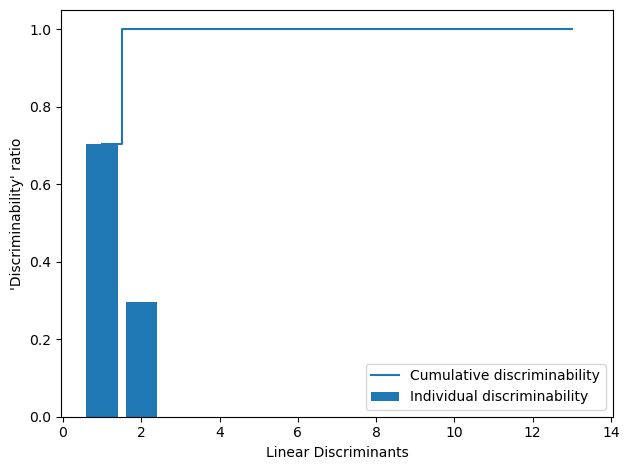

In [32]:
# Plot Linear Discriminants by decreasing eigenvalues
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative discriminability')
plt.ylabel("'Discriminability' ratio")
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [33]:
# Stack two most discriminative eigenvector columns to create transformation matrix W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
print(f"Matrix W: \n{w}")

Matrix W: 
[[-0.2 -0.3]
 [ 0.1 -0.2]
 [-0.  -0.4]
 [ 0.2  0.2]
 [-0.   0. ]
 [ 0.1  0. ]
 [-0.7  0.2]
 [-0.1  0.2]
 [ 0.   0.1]
 [ 0.5 -0.3]
 [-0.1  0.3]
 [-0.3 -0. ]
 [-0.3 -0.6]]


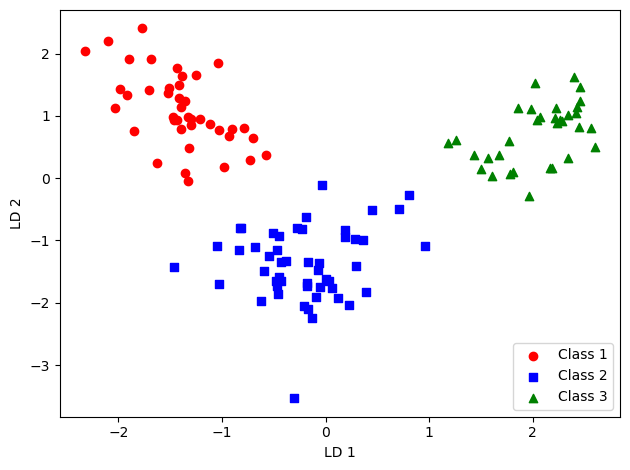

In [35]:
# Project datasets into new feature
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], 
                X_train_lda[y_train==l, 1] * (-1), 
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

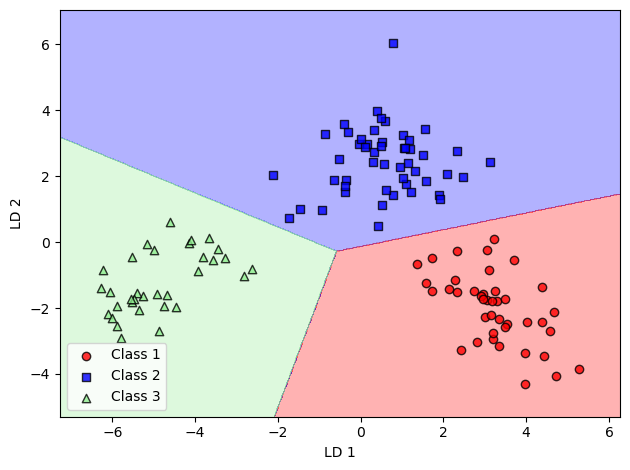

In [36]:
# Alternatively using Sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=31415926, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show();

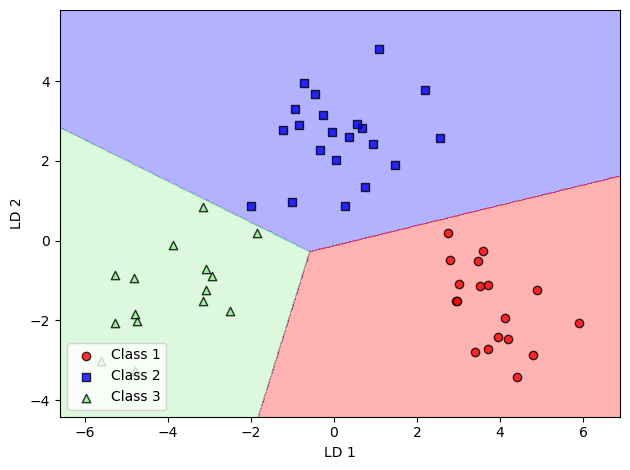

In [37]:
# Test set
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show();

## t-distributed stochastic neighbor embedding(t-SNE)

- Non-linear dimensionality reduction technique.
- Model data points based on their pair-wise distances in the high-dimensional feature space.
- Find probability distribution of pair-wise distances in the new, lower dimensional space that is close to probability distribution of pair-wise distances in the original space.

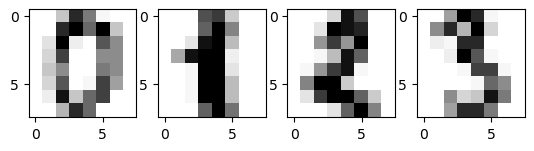

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show();

In [39]:
# Assign features and targets
y_digits = digits.target
X_digits = digits.data

In [41]:
# Shape of feature
X_digits[0].shape

(64,)

In [43]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [44]:
# Use Sklearn to fit tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            init='pca', 
            random_state=31415926)
# Project 64-dimensional features into 2-dimensional space
X_digits_tsne = tsne.fit_transform(X_digits)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Visua